In [1]:
import anndata
from histogram_custom_line import pick_line_and_reference, plot_group_distribution_along_line, plot_gene_expression_along_line
%matplotlib widget

### 0 - Load data

In [2]:
path_xenium_anndata = '/lustre/scratch127/cellgen/cellgeni/tickets/tic-3602/codes/out/0.5.3/FB_SPI-14dpi-B-anndata.zarr'
adata = anndata.read_zarr(path_xenium_anndata)
adata

AnnData object with n_obs × n_vars = 33346 × 474
    obs: 'cell_id', 'x_centroid_x', 'y_centroid_x', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'x_centroid_y', 'y_centroid_y', 'group'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'xenium'
    obsm: 'X_pca', 'X_spatial', 'X_umap'

### 1 - Define the line across which the histogram distribution has to be plotted and reference point (don't wory if the reference point will not be exactly on the line - program will correct it)

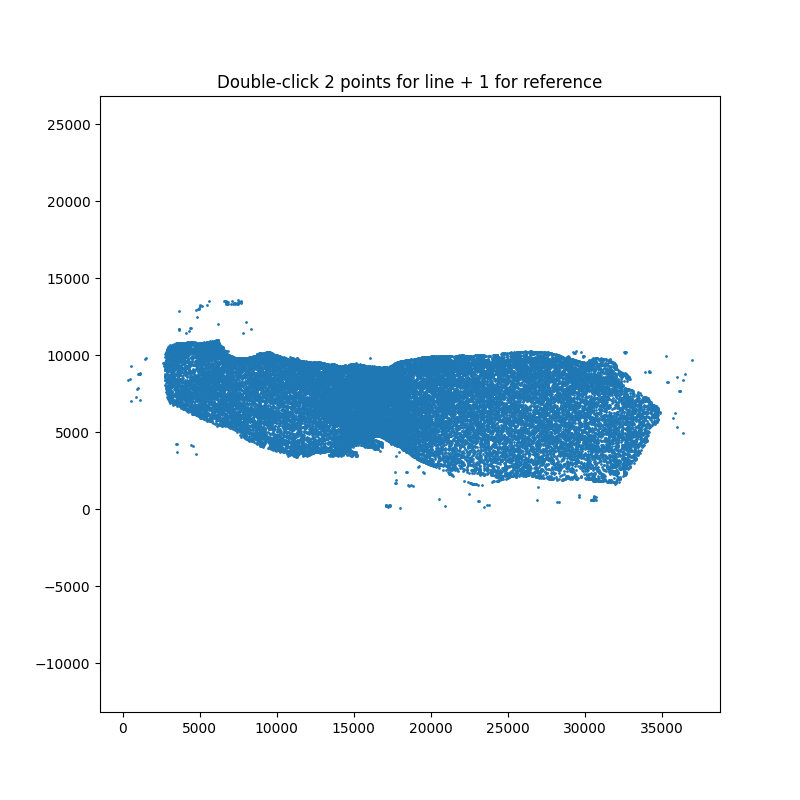

In [3]:
picked_points = None

def save_result(result):
    global picked_points
    picked_points = result

#if you want to save image use save flag and specify path to the saved image
pick_line_and_reference(adata, callback=save_result, save = 'line_reference.png')

In [5]:
## check whether the points are picked
picked_points

(array([5399.62861847, 8524.16093352]),
 array([30412.44627556,  5210.77469842]),
 array([16359.09220478,  7072.38783507]))

### 2 - Plot distribution of some cell types

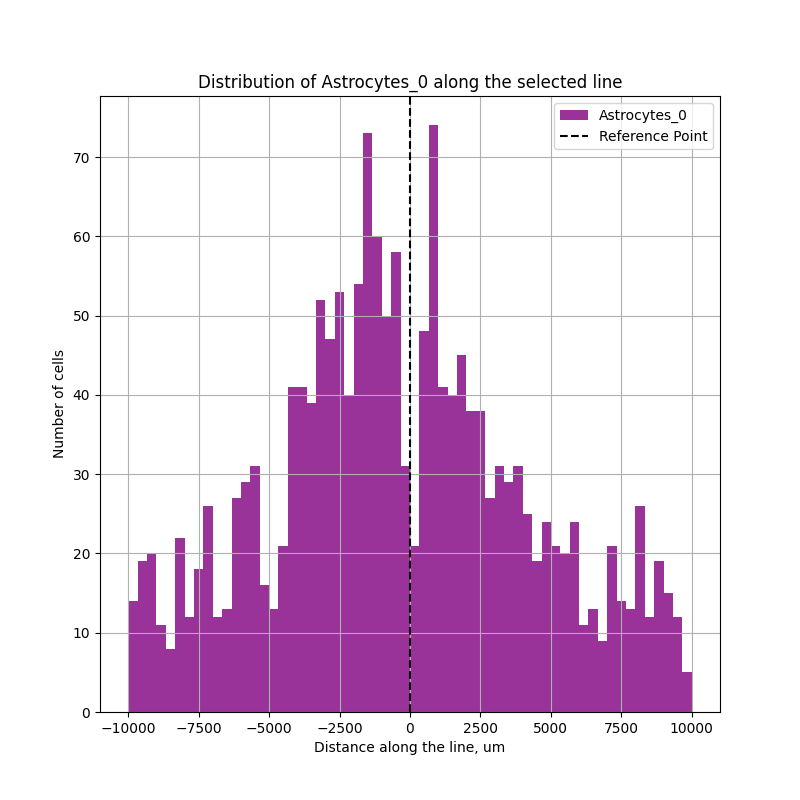

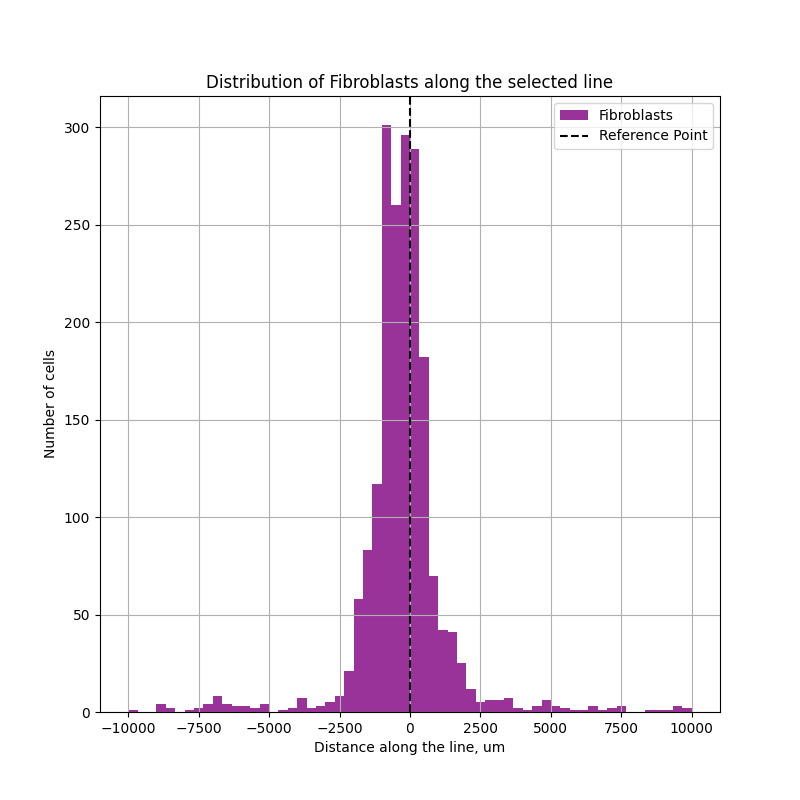

In [6]:
plot_group_distribution_along_line(adata, picked_points, xboundaries = (-10000, 10000), selected_groups=["Fibroblasts", "Astrocytes_0"], bins=60, color = 'purple', units = 'um', save_folder = 'out_figures')

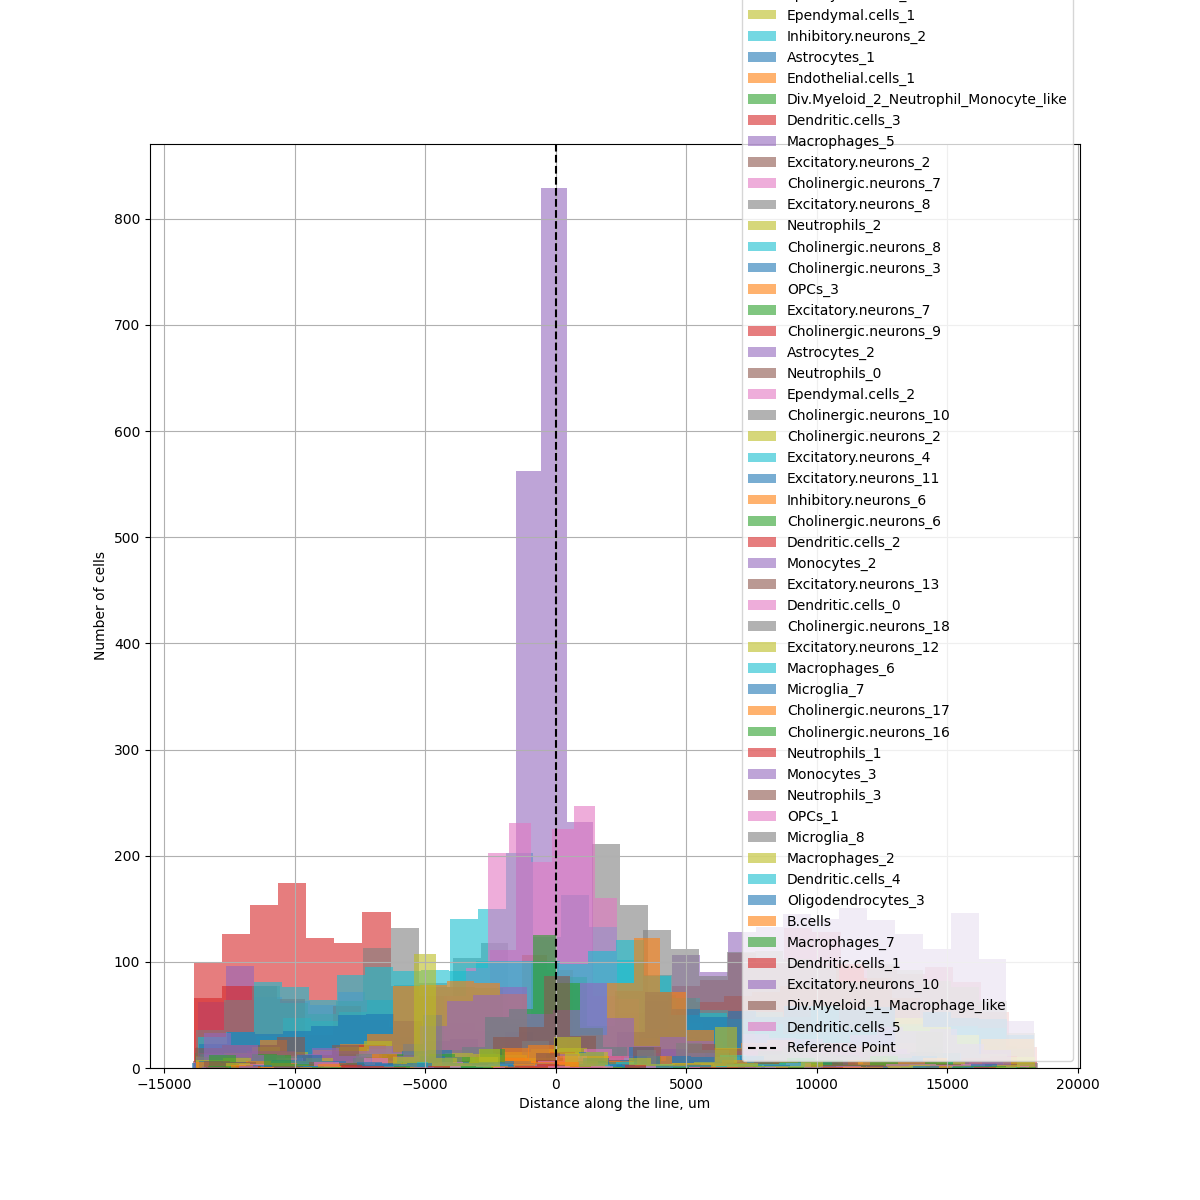

In [7]:
## lets plot all cell types together
plot_group_distribution_along_line(adata, picked_points,  bins=30, units = 'um', save_folder = 'out_figures')

### 3 - Plot gene expression distributions

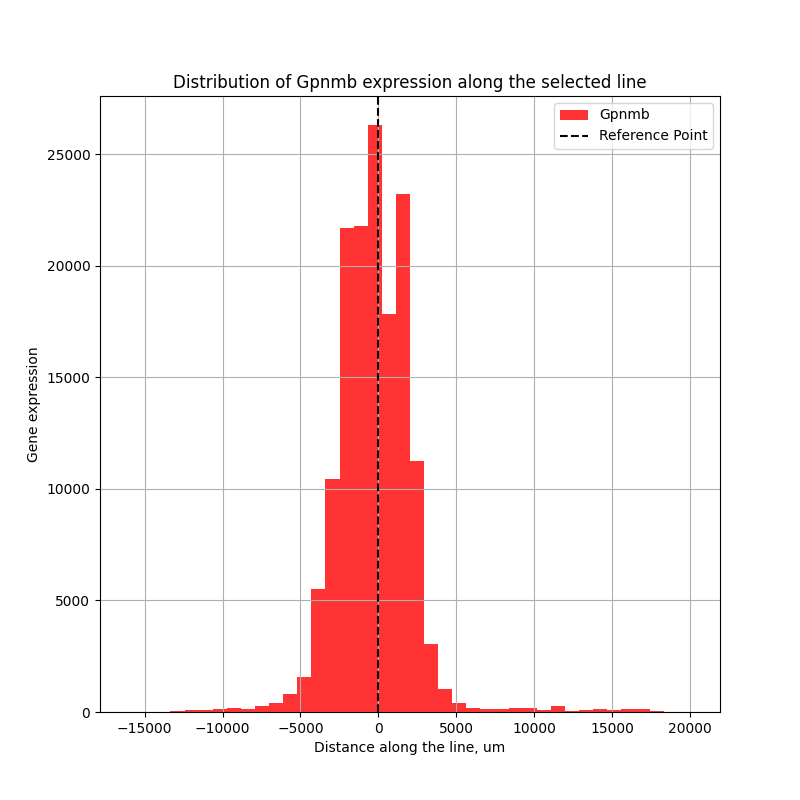

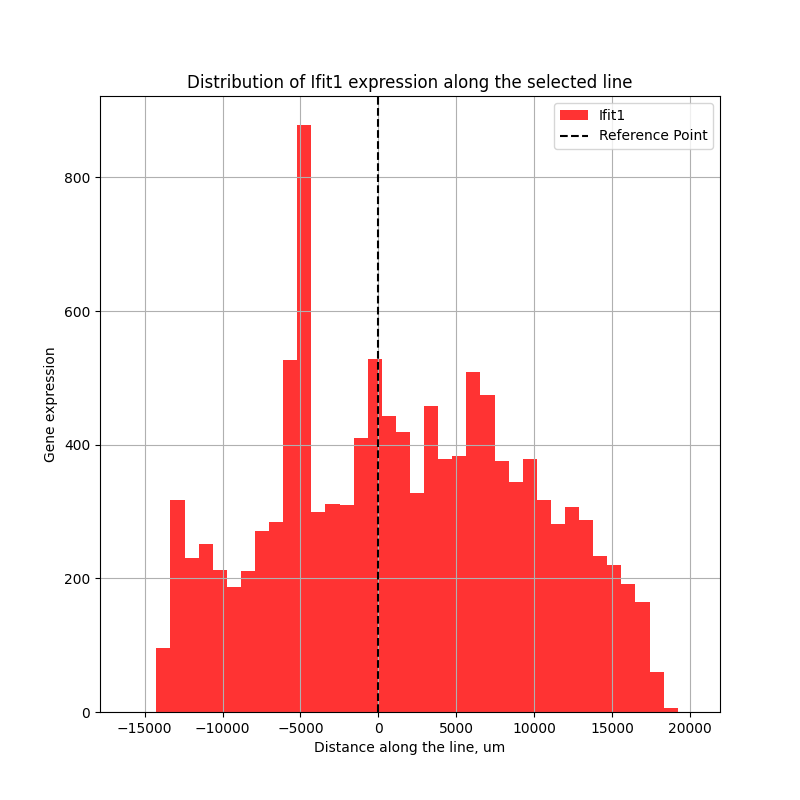

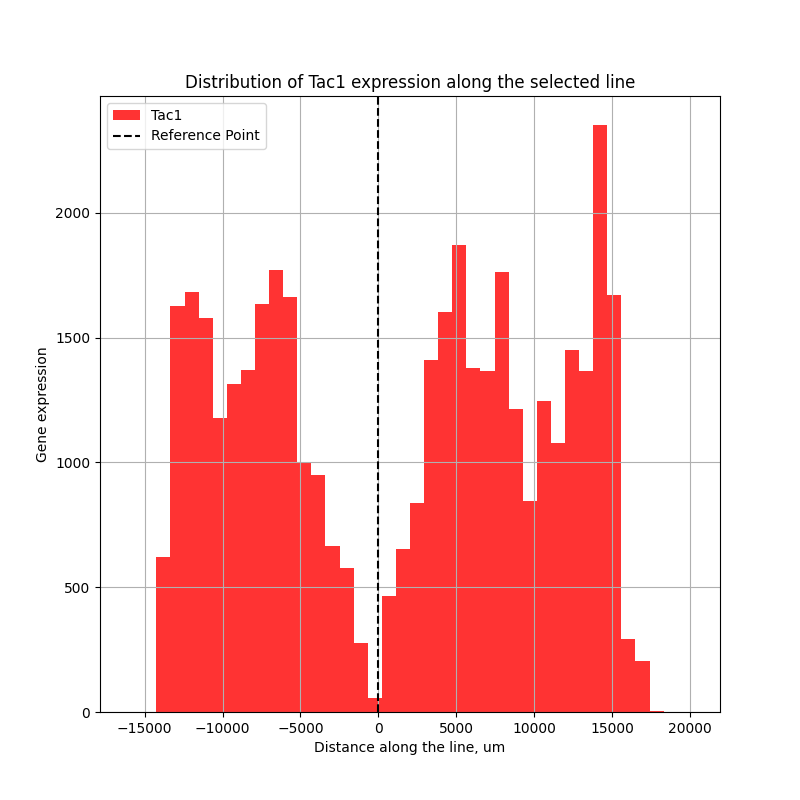

In [8]:
plot_gene_expression_along_line(adata, picked_points, selected_genes=["Ifit1", "Tac1", "Gpnmb"], bins=40, color = 'red', units = 'um', save_folder = 'out_figures')
